In [ ]:
!pip3 install tensorflow==1.5.0
!pip3 install keras==2.1.5

# Sequential = 순차모델 >> 천천히 하나씩 순방향으로 작성 
# model.add(Dense = 레이어 
# model.fit  = 학습 모델 함수  ( xdata, ydata, epochs , batchsize , verbose)

KeyboardInterrupt: ignored

In [ ]:
#binary classification - keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

x_data = np.array( [ [1,2] , [2,3] , [3,1] , [4,3] , [5,3] , [6,2] ] )
y_data = np.array([[0], [0], [0], [1], [1], [1]])

model = Sequential()
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(x_data, y_data, epochs=1000, verbose=1)
model.summary()

print(model.get_weights())
print(model.predict(x_data))

Using TensorFlow backend.


Epoch 1/1000
6/6 [==============================] - 0s 38ms/step - loss: 0.8460 - accuracy: 0.5000
Epoch 2/1000
6/6 [==============================] - 0s 445us/step - loss: 0.8185 - accuracy: 0.5000
Epoch 3/1000
6/6 [==============================] - 0s 179us/step - loss: 0.7931 - accuracy: 0.5000
Epoch 4/1000
6/6 [==============================] - 0s 322us/step - loss: 0.7699 - accuracy: 0.5000
Epoch 5/1000
6/6 [==============================] - 0s 322us/step - loss: 0.7486 - accuracy: 0.5000
Epoch 6/1000
6/6 [==============================] - 0s 315us/step - loss: 0.7291 - accuracy: 0.5000
Epoch 7/1000
6/6 [==============================] - 0s 312us/step - loss: 0.7113 - accuracy: 0.5000
Epoch 8/1000
6/6 [==============================] - 0s 314us/step - loss: 0.6950 - accuracy: 0.5000
Epoch 9/1000
6/6 [==============================] - 0s 309us/step - loss: 0.6802 - accuracy: 0.5000
Epoch 10/1000
6/6 [==============================] - 0s 299us/step - loss: 0.6668 - accuracy: 0.5000


In [ ]:
#softmax_classification - keras


import numpy as np
from keras.models import Sequential
from keras.layers import Dense # 레이어 갯수 

x_data = np.array([[1,2,1,1],[2,1,3,2],[3,1,3,4],[4,1,5,5],[1,7,5,5],[1,2,4,5]])
y_data = np.array([[0,0,1],[0,0,1],[0,0,1],[0,1,0],[0,1,0],[0,1,0]])

model = Sequential()
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])
model.fit(x_data, y_data, epochs=1000, verbose=1)
model.summary()

y_predict = model.predict(np.array([[1,11,7,9]]))
print(y_predict)
print("argmax: ", np.argmax(y_predict))

Epoch 1/1000
6/6 [==============================] - 0s 8ms/step - loss: 1.6878 - accuracy: 0.5000
Epoch 2/1000
6/6 [==============================] - 0s 279us/step - loss: 1.6419 - accuracy: 0.5000
Epoch 3/1000
6/6 [==============================] - 0s 286us/step - loss: 1.6001 - accuracy: 0.5000
Epoch 4/1000
6/6 [==============================] - 0s 369us/step - loss: 1.5618 - accuracy: 0.5000
Epoch 5/1000
6/6 [==============================] - 0s 245us/step - loss: 1.5265 - accuracy: 0.5000
Epoch 6/1000
6/6 [==============================] - 0s 219us/step - loss: 1.4938 - accuracy: 0.5000
Epoch 7/1000
6/6 [==============================] - 0s 315us/step - loss: 1.4634 - accuracy: 0.5000
Epoch 8/1000
6/6 [==============================] - 0s 269us/step - loss: 1.4349 - accuracy: 0.6667
Epoch 9/1000
6/6 [==============================] - 0s 152us/step - loss: 1.4082 - accuracy: 0.6667
Epoch 10/1000
6/6 [==============================] - 0s 249us/step - loss: 1.3830 - accuracy: 0.5000
E

In [ ]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

(train_images, train_labels),(test_images,test_labels) = mnist.load_data()
print(train_images.shape, train_labels.shape,test_images.shape, test_labels.shape)
train_images = train_images.reshape(train_images.shape[0],784).astype('float32')/255 #이미지의 값이 0~255이기에 0~1로 바꾸려한다
test_images = test_images.reshape(test_images.shape[0],784).astype('float32')/255 #이미지의 값이 0~255이기에 0~1로 바꾸려한다
train_labels = np_utils.to_categorical(train_labels)
test_labels = np_utils.to_categorical(test_labels) #One-hot encoding
print(train_images, test_images)
print( 'Labels : ',train_labels,test_labels)

model = Sequential()
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='sgd', metrics=['accuracy'])

#Training
model.fit(train_images, train_labels, epochs=5 , batch_size=32, verbose=1) # fit 저 형식대로 트레이닝 시켜준다 verbose = 트레이닝하는 과정을 보여줌 

#Testing 
_, accuracy = model.evaluate(test_images, test_labels)
print('Accuracy: ', accuracy)
model.summary() # 표로 표시해줌 


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Labels :  [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]] [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Epoch 1/5
60000/60000 [==============================] - 7s 111us/step - loss: 0.6067 - accuracy: 0.8403
Epoch 2/5
60000/60000 [==============================] - 7s 110us/step - loss: 0.2586 - accuracy: 0.9254
Epoch 3/5
60000/60000 [==============================] - 7s 111us/step - loss: 0.2012 - accuracy: 0.9417
E

In [ ]:
#MNIST - keras

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, pooling , Flatten

(train_images,train_labels),(test_images,test_labels) = mnist.load_data()
print(train_images.shape, train_labels.shape,test_images.shape,test_labels.shape)
train_images = train_images.reshape(train_images.shape[0],28,28,1).astype('float32')/255
test_images = test_images.reshape(test_images.shape[0],28,28,1).astype('float32')/255
train_labels = np_utils.to_categorical(train_labels) # 레이블을 원핫인코딩으로 바꿔즘 
test_labels = np_utils.to_categorical(test_labels)


#Model
model = Sequential()
model.add(Conv2D(32,(3,3), padding='same',strides=(1,1), activation='relu', input_shape=(28,28,1)))
print('convolution 1st: ', model.output_shape)
model.add(pooling.MaxPooling2D(pool_size=(2,2)))
print('pooling 1st: ', model.output_shape)

model.add(Conv2D(64,(3,3), padding='same',strides=(1,1), activation='relu', input_shape=(28,28,1)))
print(model.output_shape)
model.add(pooling.MaxPooling2D(pool_size=(2,2)))
print(model.output_shape)
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

#Training 
model.fit(train_images, train_labels, epochs=5 , batch_size=32, verbose=1)

#Testing 
_,accuracy= model.evaluate(test_images,test_labels)
print('Accuracy: ', accuracy)
model.summary()



(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
convolution 1st:  (None, 28, 28, 32)
pooling 1st:  (None, 14, 14, 32)
(None, 14, 14, 64)
(None, 7, 7, 64)
Epoch 1/5
60000/60000 [==============================] - 62s 1ms/step - loss: 0.5835 - accuracy: 0.8291
Epoch 2/5
60000/60000 [==============================] - 63s 1ms/step - loss: 0.1720 - accuracy: 0.9495
Epoch 3/5
60000/60000 [==============================] - 63s 1ms/step - loss: 0.1172 - accuracy: 0.9657
Epoch 4/5
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0927 - accuracy: 0.9722
Epoch 5/5
10000/10000 [==============================] - 3s 318us/step
Accuracy:  0.9797999858856201
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 

In [2]:
import os 
import re
import pandas as pd
import tensorflow as tf
from tensorflow.keras import utils 

#IMDB 데이터 다운로드
data_set = tf.keras.utils.get_file(
    fname = 'imdb.tar.gz',
    origin = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz",
    extract = True)

#각 파일에 리부 텍스트를 불러오는 함수 

def directory_data(directory):
  data = {}
  data['review'] = []
  for file_path in os.listdir(directory):
    with open(os.path.join(directory,file_path),'r', encoding = 'utf-8') as file:
      data['review'].append(file.read())
  return pd.DataFrame.from_dict(data)

def data(directory):
  pos_df = directory_data(os.path.join(directory,'pos'))
  neg_df = directory_data(os.path.join(directory,'neg'))
  pos_df['sentiment'] = 1
  neg_df['sentiment'] = 0
  return pd.concat([pos_df, neg_df])

train_df = data(os.path.join(os.path.dirname(data_set),'aclImdb', 'train'))
test_df = data(os.path.join(os.path.dirname(data_set),'aclImdb', 'test'))
  

84131840/84125825 [==============================] - 2s 0us/step


In [5]:
print(train_df.head())

reviews = list(train_df['review'])

tokenized_review = [r.split() for r in reviews]
review_len_by_token = [len(t) for t in tokenized_review]
review_len_by_alphabet = [len(s.replace(' ','')) for s in reviews]
print(review_len_by_alphabet)

                                              review  sentiment
0  This film enhanced my opinion of Errol Flynn. ...          1
1  I would just like all of the fans of this docu...          1
2  Still love it 17 or so years after the first t...          1
3  Pinjar is one of the few movies that really le...          1
4  "Elvira, Mistress Of The Dark" is a sort of "H...          1
[770, 770, 506, 689, 1639, 1284, 677, 1586, 583, 1473, 497, 579, 744, 1123, 1144, 578, 2757, 590, 563, 893, 549, 461, 2121, 1083, 465, 585, 865, 1172, 492, 612, 987, 4320, 1004, 689, 1753, 2712, 460, 677, 254, 1143, 1069, 627, 1843, 657, 2549, 541, 513, 128, 1434, 849, 354, 592, 663, 2767, 683, 1243, 832, 503, 3649, 1897, 1121, 206, 730, 729, 2420, 365, 2111, 4823, 303, 2235, 1719, 572, 588, 609, 2168, 2402, 842, 572, 2552, 723, 534, 559, 3685, 1562, 629, 776, 1238, 1092, 370, 605, 851, 636, 837, 976, 813, 2718, 594, 1999, 1801, 1199, 685, 643, 345, 2292, 537, 545, 574, 885, 2190, 513, 378, 1987, 507, 1773, 3

Text(0, 0.5, 'numberof reviews')

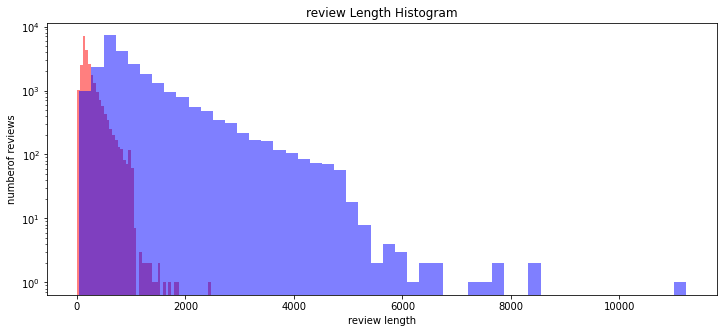

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.hist(review_len_by_token, bins=50, alpha=0.5, color='r', label='word')
plt.hist(review_len_by_alphabet, bins=50, alpha=0.5, color='b', label='alphabet')
plt.yscale('log', nonposy='clip') # bin = 

plt.title('review Length Histogram')
plt.xlabel('review length')
plt.ylabel('numberof reviews')


In [7]:
import numpy as np

print('문장 최대 단어 갯수: ',np.max(review_len_by_token) )
print('문장 최소 단어 갯수: ', np.min(review_len_by_token))
print('문장 단어 평균 갯수 : ', np.mean(review_len_by_token))
print('문장 길이 표준 편차: ', np.std(review_len_by_token))
print('문장 중간 단어 갯수 : ', np.median(review_len_by_token))


print(' 제 1사분위 길이 : ', np.percentile(review_len_by_token, 25))
print('제 3 사분위 길이 : ', np.percentile(review_len_by_token, 75))

문장 최대 단어 갯수:  2470
문장 최소 단어 갯수:  10
문장 단어 평균 갯수 :  233.7872
문장 길이 표준 편차:  173.72955740506563
문장 중간 단어 갯수 :  174.0
 제 1사분위 길이 :  127.0
제 3 사분위 길이 :  284.0
